<a href="https://colab.research.google.com/github/saatweek/Coronavirus_tweets_NLP_Text_Classification/blob/master/Corona_Tweets_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mounting Google Drive to this colab notebook

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing all the dependencies

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#training file and test file paths

train_csv_path = "/content/drive/My Drive/Colab Notebooks/Personal Projects/Corona tweets/Corona_NLP_train.csv"
test_csv_path = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Corona tweets/Corona_NLP_test.csv'

In [33]:
#reading the training_file through pandas

training_dataframe = pd.read_csv(train_csv_path, encoding = "ISO-8859-1")
training_dataframe.dropna()
testing_dataframe = pd.read_csv(test_csv_path)
testing_dataframe.dropna()
print(training_dataframe.shape)
training_dataframe.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [34]:
print(testing_dataframe.shape)
testing_dataframe.head()

(3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [35]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [36]:
for sentences in training_dataframe.iloc[:, -2]:
    training_sentences.append(sentences)

for labels in training_dataframe.iloc[:, -1]:
    labels = labels.replace(' ', '')
    training_labels.append(labels)

for sentences in testing_dataframe.iloc[:, -2]:
    testing_sentences.append(sentences)

for labels in testing_dataframe.iloc[:, -1]:
    labels = labels.replace(' ', '')
    testing_labels.append(labels)

In [37]:
print('Training Sentences :', training_sentences[:5])
print('Training Sentences Shape : ', len(training_sentences))
print('Training Labels: ', training_labels[:5])
print('Training Labels Shape : ', len(training_labels))
print('Testing Sentences :', testing_sentences[:5])
print('Testing Sentences Shape :', len(testing_sentences))
print('Testing Labels : ', testing_labels[:5])
print('Testing Labels Shape: ', len(testing_labels))

Training Sentences : ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8', 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order', 'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P', "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j", "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus 

In [38]:
#Hyperparameters
vocab_size = 10000
oov_tok = '<OOV>'
max_length = 64
pad_type = 'post'
trunc_type = 'pre'
num_labels = 5

In [39]:
sentence_tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
label_tokenizer = Tokenizer(num_words = num_labels, oov_token = oov_tok)

sentence_tokenizer.fit_on_texts(training_sentences)
label_tokenizer.fit_on_texts(training_labels)

sentence_word_index = sentence_tokenizer.word_index
label_word_index = label_tokenizer.word_index

In [40]:
training_sequence = sentence_tokenizer.texts_to_sequences(training_sentences)
testing_sequence = sentence_tokenizer.texts_to_sequences(testing_sentences)
training_label_sequence = label_tokenizer.texts_to_sequences(training_labels)
testing_label_sequence = label_tokenizer.texts_to_sequences(testing_labels)

padded_training = pad_sequences(training_sequence, maxlen = max_length, padding = pad_type, truncating = trunc_type)
padded_testing = pad_sequences(testing_sequence, maxlen = max_length, padding = pad_type, truncating = trunc_type)

In [41]:
padded_training = np.array(padded_training)
training_label_sequence = np.array(training_label_sequence)
padded_testing = np.array(padded_testing)
testing_label_sequence = np.array(testing_label_sequence)
print(padded_training.shape)
print(training_label_sequence.shape)
print(padded_testing.shape)
print(testing_label_sequence.shape)

(41157, 64)
(41157, 1)
(3798, 64)
(3798, 1)


In [42]:
embedding_dims = 16
num_epochs = 500

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(padded_training, training_label_sequence, 
                    validation_data = (padded_testing, testing_label_sequence), 
                    epochs = num_epochs)

Epoch 1/500
1287/1287 [==============================] - 4s 3ms/step - loss: 1.3250 - accuracy: 0.3640 - val_loss: 1.2342 - val_accuracy: 0.4268
Epoch 2/500
1287/1287 [==============================] - 4s 3ms/step - loss: 1.1699 - accuracy: 0.4825 - val_loss: 1.1498 - val_accuracy: 0.4887
Epoch 3/500
1287/1287 [==============================] - 4s 3ms/step - loss: 1.0462 - accuracy: 0.5727 - val_loss: 1.1123 - val_accuracy: 0.5195
Epoch 4/500
1287/1287 [==============================] - 4s 3ms/step - loss: 0.9579 - accuracy: 0.6189 - val_loss: 1.0969 - val_accuracy: 0.5437
Epoch 5/500
1287/1287 [==============================] - 4s 3ms/step - loss: 0.8907 - accuracy: 0.6537 - val_loss: 1.0926 - val_accuracy: 0.5345
Epoch 6/500
1287/1287 [==============================] - 4s 3ms/step - loss: 0.8339 - accuracy: 0.6776 - val_loss: 1.0887 - val_accuracy: 0.5592
Epoch 7/500
1287/1287 [==============================] - 4s 3ms/step - loss: 0.7824 - accuracy: 0.7007 - val_loss: 1.0817 - val_ac

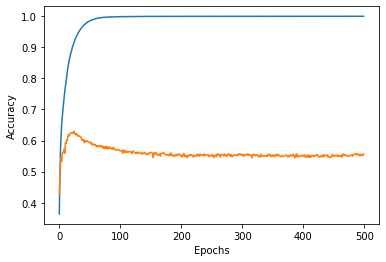

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()